# Key Performance Index


Insurance KPI Summary:
Total Records: 1338
Average Age: 39.21
Average BMI: 30.66
Average Charges: 13270.42
Median Age: 39.0
Median BMI: 30.4
Median Charges: 9382.03
Minimum Age: 18
Minimum BMI: 15.96
Minimum Charges: 1121.8739
Maximum Age: 64
Maximum BMI: 53.13
Maximum Charges: 63770.42801
Percentage of Smokers: 20.48
Percentage of Non-Smokers: 79.52
Percentage of Males: 50.52
Percentage of Females: 49.48
Region-wise Distribution: {'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}
Average Charges (Smokers): 32050.23
Average Charges (Non-Smokers): 8434.27

Generating Visualizations...


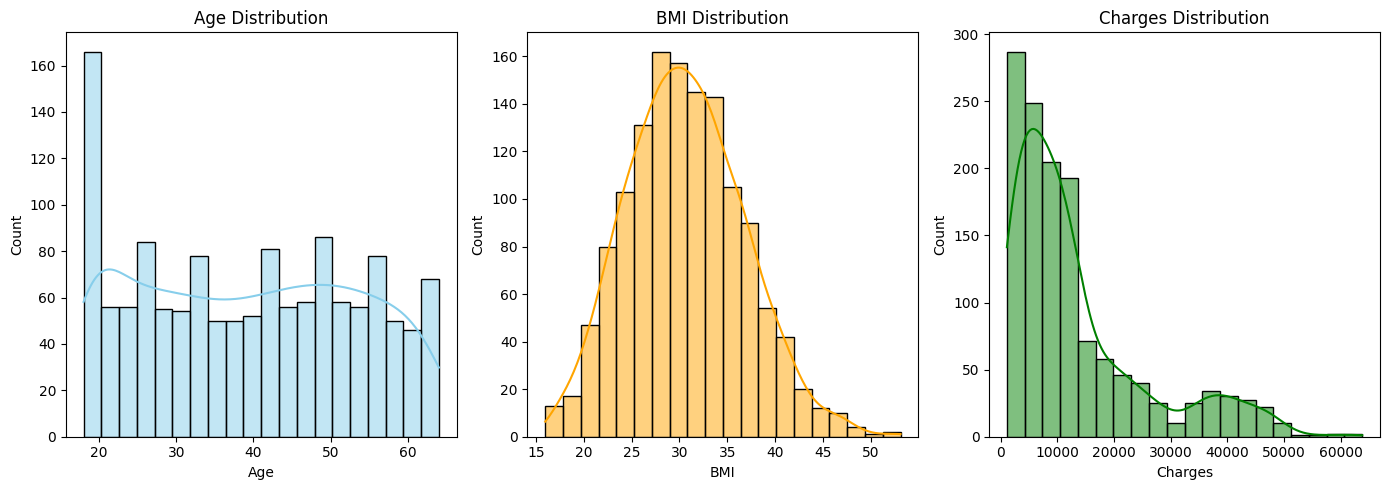

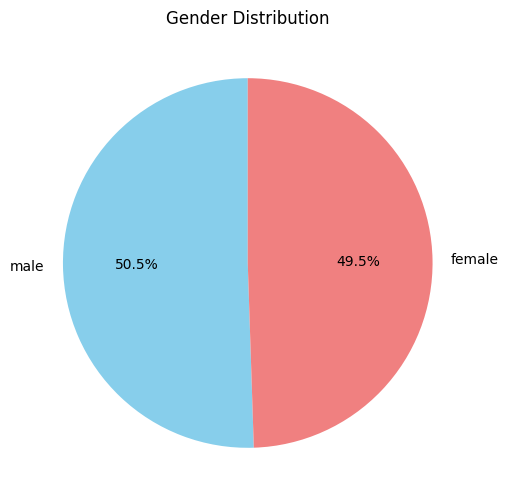

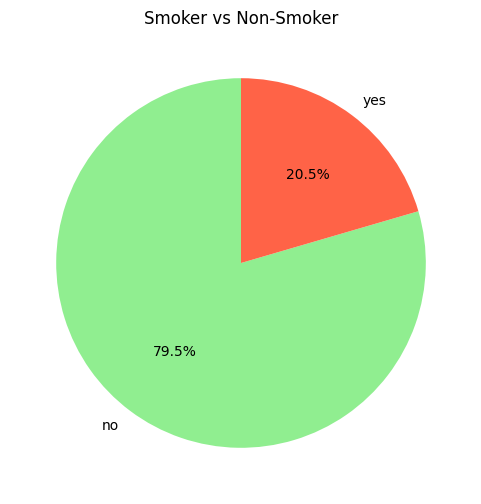

C:\Users\omend\AppData\Local\Temp\ipykernel_21548\1729803772.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')


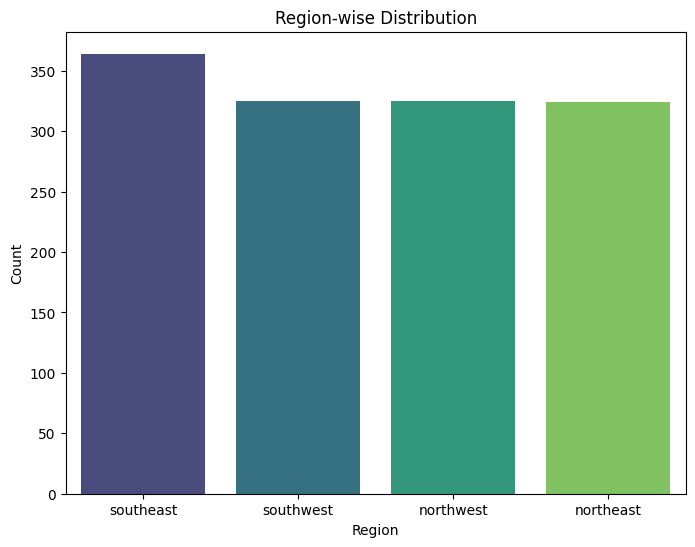

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_insurance_kpis(data):
    """
    Calculate and return key performance indicators (KPIs) for the insurance dataset.
    KPIs include average, median, min, max values, gender distribution, smoking status, and more.
    """
    kpis = {}

    # Total number of records (entries) in the dataset
    kpis['Total Records'] = len(data)

    # Average metrics for age, BMI, and charges
    kpis['Average Age'] = round(data['age'].mean(), 2)
    kpis['Average BMI'] = round(data['bmi'].mean(), 2)
    kpis['Average Charges'] = round(data['charges'].mean(), 2)

    # Median, Min, Max metrics for Age, BMI, and Charges
    kpis['Median Age'] = round(data['age'].median(), 2)
    kpis['Median BMI'] = round(data['bmi'].median(), 2)
    kpis['Median Charges'] = round(data['charges'].median(), 2)
    
    kpis['Minimum Age'] = data['age'].min()
    kpis['Minimum BMI'] = data['bmi'].min()
    kpis['Minimum Charges'] = data['charges'].min()

    kpis['Maximum Age'] = data['age'].max()
    kpis['Maximum BMI'] = data['bmi'].max()
    kpis['Maximum Charges'] = data['charges'].max()

    # Smoking status distribution (percentage of smokers vs non-smokers)
    smoker_distribution = data['smoker'].value_counts(normalize=True) * 100
    kpis['Percentage of Smokers'] = round(smoker_distribution.get('yes', 0), 2)
    kpis['Percentage of Non-Smokers'] = round(smoker_distribution.get('no', 0), 2)

    # Gender distribution (percentage of males vs females)
    gender_distribution = data['sex'].value_counts(normalize=True) * 100
    kpis['Percentage of Males'] = round(gender_distribution.get('male', 0), 2)
    kpis['Percentage of Females'] = round(gender_distribution.get('female', 0), 2)

    # Region-wise distribution of individuals in the dataset
    region_distribution = data['region'].value_counts().to_dict()
    kpis['Region-wise Distribution'] = region_distribution

    # Average medical charges based on smoker status
    average_charges_by_smoker = data.groupby('smoker')['charges'].mean().to_dict()
    kpis['Average Charges (Smokers)'] = round(average_charges_by_smoker.get('yes', 0), 2)
    kpis['Average Charges (Non-Smokers)'] = round(average_charges_by_smoker.get('no', 0), 2)

    return kpis

def visualize_insurance_data(data):
    """
    Visualize the distribution of Age, BMI, Charges, Gender, and Smoker status in the dataset using graphs.
    """
    # Plot histograms for Age, BMI, and Charges to show distribution
    plt.figure(figsize=(14, 5))

    # Plot for Age distribution
    plt.subplot(1, 3, 1)
    sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
    plt.title('Age Distribution')
    plt.xlabel('Age')

    # Plot for BMI distribution
    plt.subplot(1, 3, 2)
    sns.histplot(data['bmi'], bins=20, kde=True, color='orange')
    plt.title('BMI Distribution')
    plt.xlabel('BMI')

    # Plot for Charges distribution
    plt.subplot(1, 3, 3)
    sns.histplot(data['charges'], bins=20, kde=True, color='green')
    plt.title('Charges Distribution')
    plt.xlabel('Charges')

    plt.tight_layout()
    plt.show()

    # Pie chart for Gender distribution (Male vs Female)
    gender_distribution = data['sex'].value_counts()
    plt.figure(figsize=(6, 6))
    gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title('Gender Distribution')
    plt.ylabel('')
    plt.show()

    # Pie chart for Smoker distribution (Smoker vs Non-Smoker)
    smoker_distribution = data['smoker'].value_counts()
    plt.figure(figsize=(6, 6))
    smoker_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'tomato'])
    plt.title('Smoker vs Non-Smoker')
    plt.ylabel('')
    plt.show()

    # Bar plot for Region-wise distribution
    region_distribution = data['region'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
    plt.title('Region-wise Distribution')
    plt.ylabel('Count')
    plt.xlabel('Region')
    plt.show()

# Main section
if __name__ == "__main__":
    # Load the insurance dataset (CSV file)
    df = pd.read_csv('insurance.csv')

    # Calculate and retrieve the KPIs (Key Performance Indicators)
    kpis = calculate_insurance_kpis(df)

    # Display the KPIs in a human-readable format
    print("\nInsurance KPI Summary:")
    for key, value in kpis.items():
        print(f"{key}: {value}")

    # Generate and display the visualizations (graphs)
    print("\nGenerating Visualizations...")
    visualize_insurance_data(df)
